# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, you'll practice your knowledge of correlation, autocorrelation, and partial autocorrelation by working on three different datasets. 

## Objectives

In this lab you will: 

- Plot and discuss the autocorrelation function (ACF) for a time series 
- Plot and discuss the partial autocorrelation function (PACF) for a time series 

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. 

- First, run the following cell to import all the libraries and the functions required for this lab 
- Then import the data in `'exch_rates.csv'` 
- Change the data type of the `'Frequency'` column 
- Set the `'Frequency'` column as the index of the DataFrame 

In [1]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [4]:
# Import data
xr = pd.read_csv('exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr['Frequency'] = pd.to_datetime(xr['Frequency'])

# Set the 'Frequency' column as the index
xr.set_index('Frequency', inplace=True)

Plot all three exchange rates in one graph: 

In [5]:
xr

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170
...,...,...,...
2018-11-22,0.876962,1.378672,6.543541
2018-11-23,0.880902,1.383721,6.573115
2018-11-24,NaN,NaN,NaN


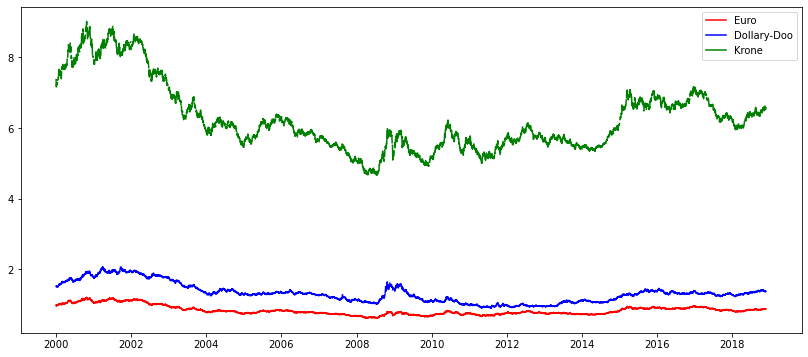

In [6]:
# Plot here
fig = plt.figure(figsize=(14,6))

plt.plot(xr['Euro'], color='red', label='Euro')
plt.plot(xr['Australian Dollar'], color='blue', label='Dollary-Doo')
plt.plot(xr['Danish Krone'], color='green', label='Krone')
plt.legend()
plt.show()

You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series. 

In [7]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

In [8]:
# Euro and Krone are completely related, Aus dollar highly related to both

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot. 

In [10]:
# 1-lag differenced series 
xr_diff = xr.diff()

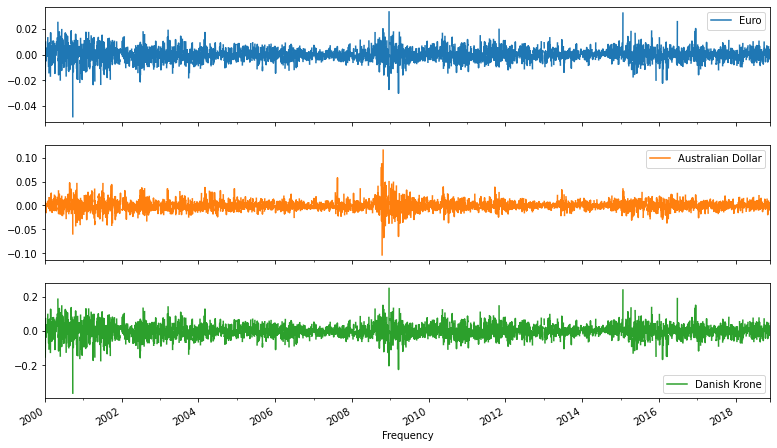

In [13]:
# Plot
xr_diff.plot(figsize=(13,8), subplots=True, legend=True);

Calculate the correlation of this differenced time series. 

In [12]:
# Correlation 
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

In [14]:
# Krone and Euro are still completely correlated, but Aus Dollar is less correlated now. 
# Because the correlation was related to seasonality, and differencing removed that element, it is normal
# For the correlation to go down.

Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate. 

- Create a "lag-1 autocorrelation" series 
- Combine both the original and the shifted ("lag-1 autocorrelation") series into a DataFrame 
- Plot these time series, and look at the correlation coefficient 

In [15]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift(periods=1)

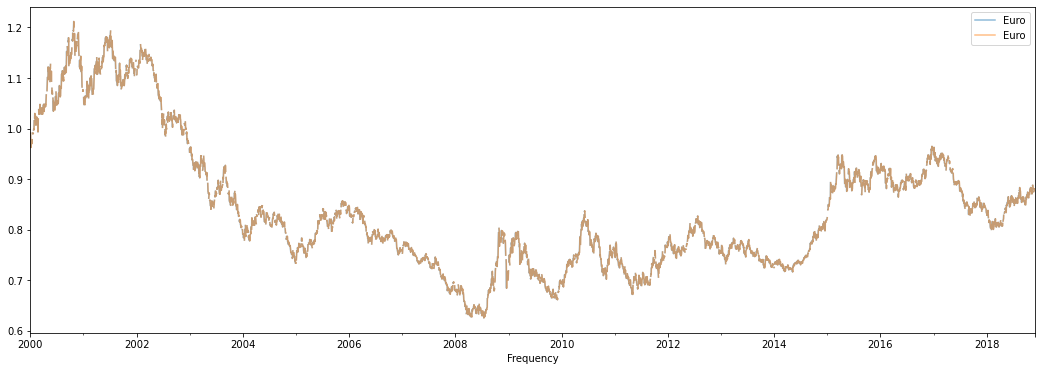

In [23]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur, eur_shift_1], axis=1)

# Plot 
lag_1.plot(figsize=(18,6), alpha=.5);

In [21]:
# Correlation
lag_1.corr()

,Euro,Australian Dollar,Danish Krone,Euro
Euro,1.000000,0.883181,0.999952,0.999146
Australian Dollar,0.883181,1.000000,0.882513,0.882681
Danish Krone,0.999952,0.882513,1.000000,0.999095
Euro,0.999146,0.882681,0.999095,1.000000


Repeat this for a "lag-50 autocorrelation". 

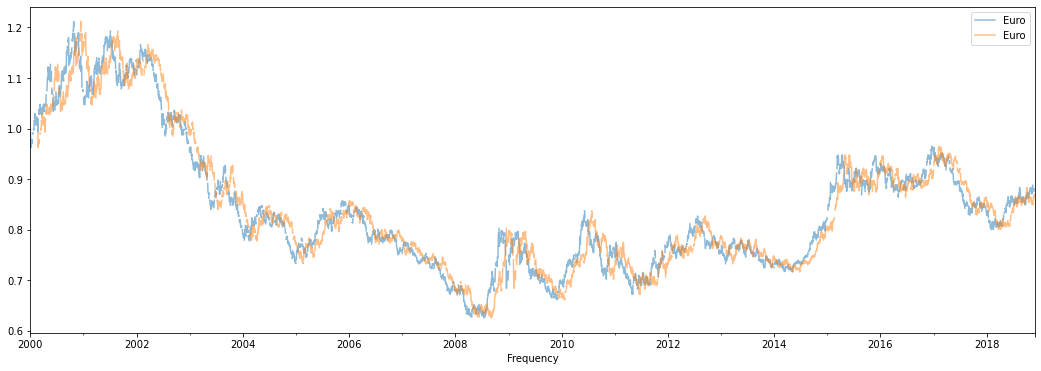

In [24]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(periods=50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur, eur_shift_50], axis=1)

# Plot
lag_50.plot(figsize=(18,6), alpha=.5);

In [25]:
# Correlation
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

In [26]:
# Autocorrelation is very high in these time series, even up to a lag as big as 50! 
# This is no big surprise though: remember that these are random walk series, 
# which are highly recursive, as each value depends heavily on the previous one!

Knowing this, let's plot the ACF now.

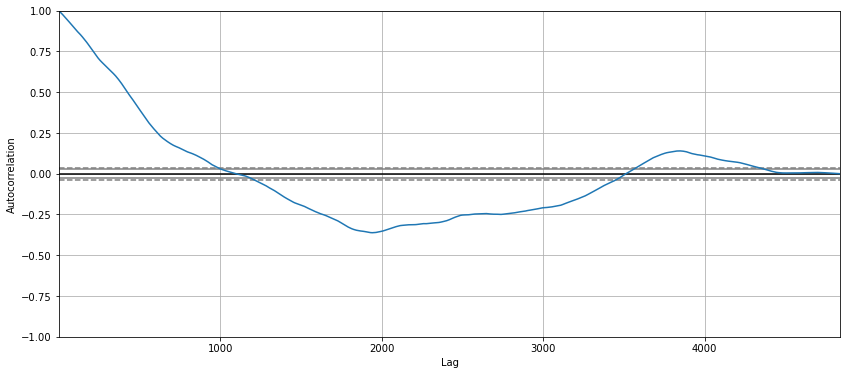

In [30]:
# Plot ACF
plt.figure(figsize=(14,6))

pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

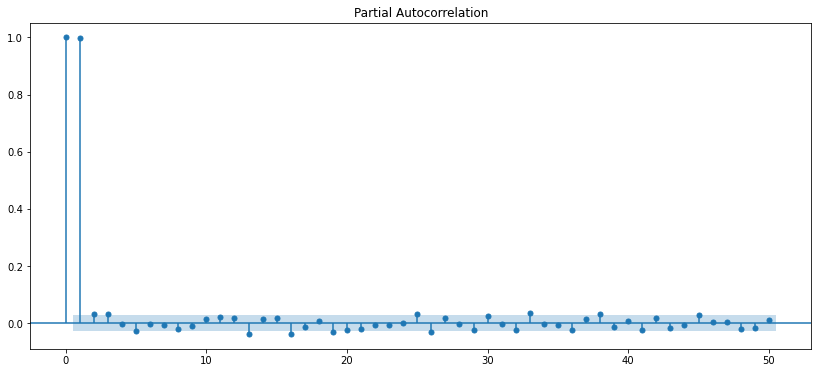

In [33]:
# Plot PACF
rcParams['figure.figsize'] = 14, 6

plot_pacf(eur.dropna(), lags=50);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Data

Let's work with the air passenger dataset you have seen before. Plot the ACF and PACF for both the differenced and regular series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [34]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


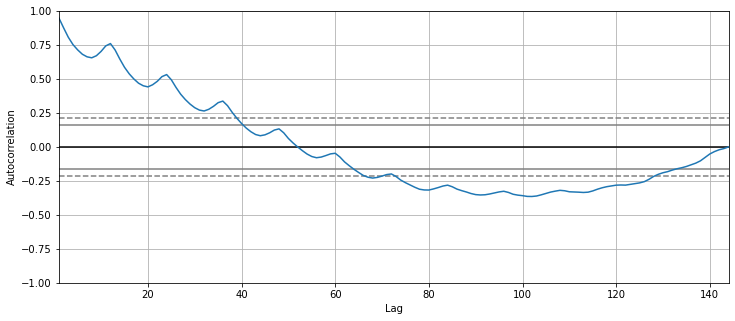

In [45]:
# Plot ACF (regular)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air);

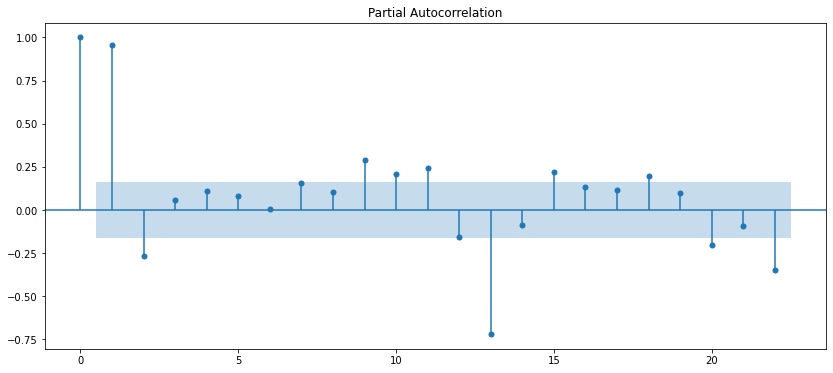

In [37]:
# Plot PACF (regular)
plot_pacf(air);

In [38]:
# Generate a differenced series
air_diff = air.diff()

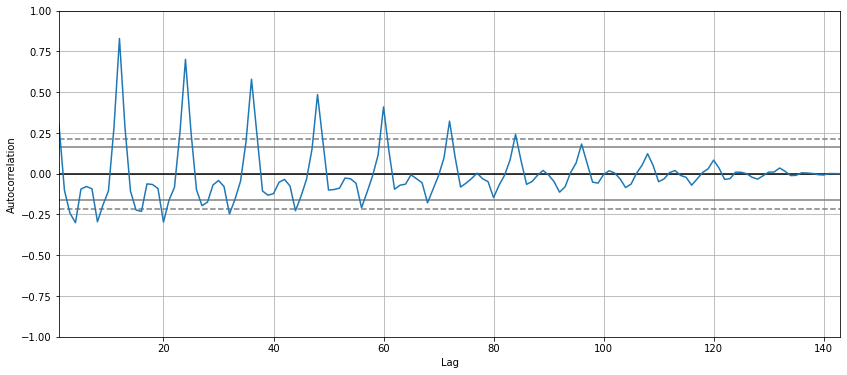

In [40]:
# Plot ACF (differenced)

pd.plotting.autocorrelation_plot(air_diff.dropna());

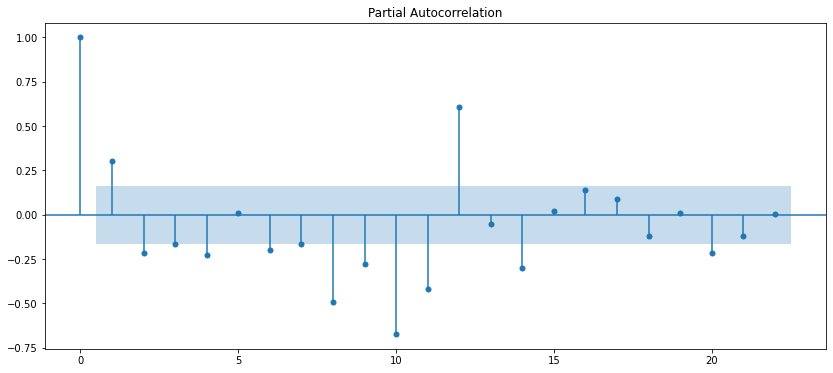

In [42]:
# Plot PACF (differenced)
plot_pacf(air_diff.dropna());

### Your conclusion here

In [ ]:
# # The result reminds us a lot of the google trends data. 
# The seasonality is much more clear in the differenced time series. 
# The PACF has just one very strong correlation, right at 12 months.

## The NYSE data

Are you getting the hang of interpreting ACF and PACF plots? For one final time, plot the ACF and PACF for both the NYSE time series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [46]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


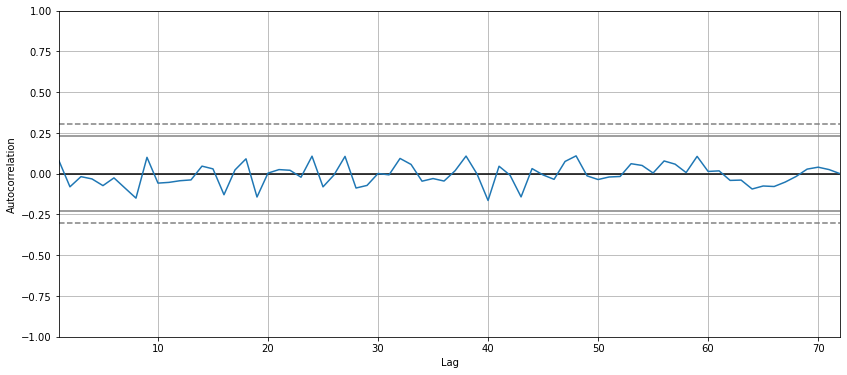

In [48]:
# Plot ACF
plt.figure(figsize=(14,6))

pd.plotting.autocorrelation_plot(nyse);

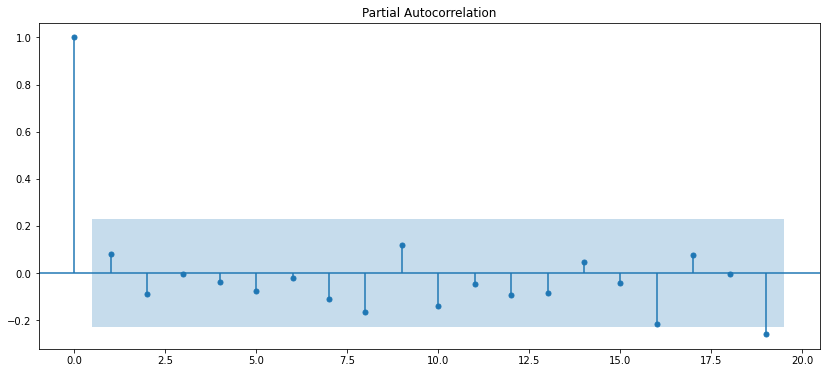

In [50]:
# Plot PACF
plot_pacf(nyse);

## Your conclusion here

In [51]:
# Autocorrelation and PACF are nearly 0 for ay lag
# NYSE is a white noise series, meaning no seasonality or trend



## Summary

Great, you've now been introduced to ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!